In [ ]:
from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


In [ ]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Moondash/moondash_data.xlsx', sheet_name='moondash_data')

In [ ]:
display(df)

,effective_date,employee_id,job_function,location,job_level,employee_status,hire_date,pay_rate_type,role_volume_type
0,2022-03-31,16041,HR,"New York City, New York",L5,Active,2020-08-10,Salary,Low
1,2022-03-31,16449,Sales,"New York City, New York",L6,Active,2020-04-05,Salary,Low
2,2022-03-31,15822,Engineering,"San Francisco, California",L4,Active,2021-12-03,Salary,Low
3,2022-03-31,15417,Sales,"San Francisco, California",L5,Active,2021-08-01,Salary,Low
4,2022-03-31,14944,HR,"San Francisco, California",L4,Active,2021-03-01,Salary,Low
...,...,...,...,...,...,...,...,...,...
68995,2024-12-31,11295,Strategy & Operations,"Orlando, Florida",L3,Active,2024-06-15,Salary,Low
68996,2024-12-31,10773,Strategy & Operations,"Orlando, Florida",L2,Active,2024-03-25,Hourly,High
68997,2024-12-31,14432,Strategy & Operations,"Orlando, Florida",L2,Terminated,2024-12-24,Hourly,High
68998,2024-12-31,12041,Strategy & Operations,"Orlando, Florida",L2,Active,2024-06-29,Hourly,High


# This is a simple implementation of a pythonic version of what a Graph database with this kind of data could look like:


In [ ]:

# Initialize Graph
G = nx.Graph()

# Add Employee Nodes
for _, row in df.iterrows():
    G.add_node(row["employee_id"], role=row["job_function"], location=row["location"], job_level=row["job_level"], turnover=row["employee_status"])

# Add Job Function Edges
for _, row in df.iterrows():
    G.add_edge(row["employee_id"], row["job_function"], relation="works_in")

# Add Location Edges
for _, row in df.iterrows():
    G.add_edge(row["employee_id"], row["location"], relation="located_in")


In [ ]:
print(G)

Graph with 19309 nodes and 43520 edges


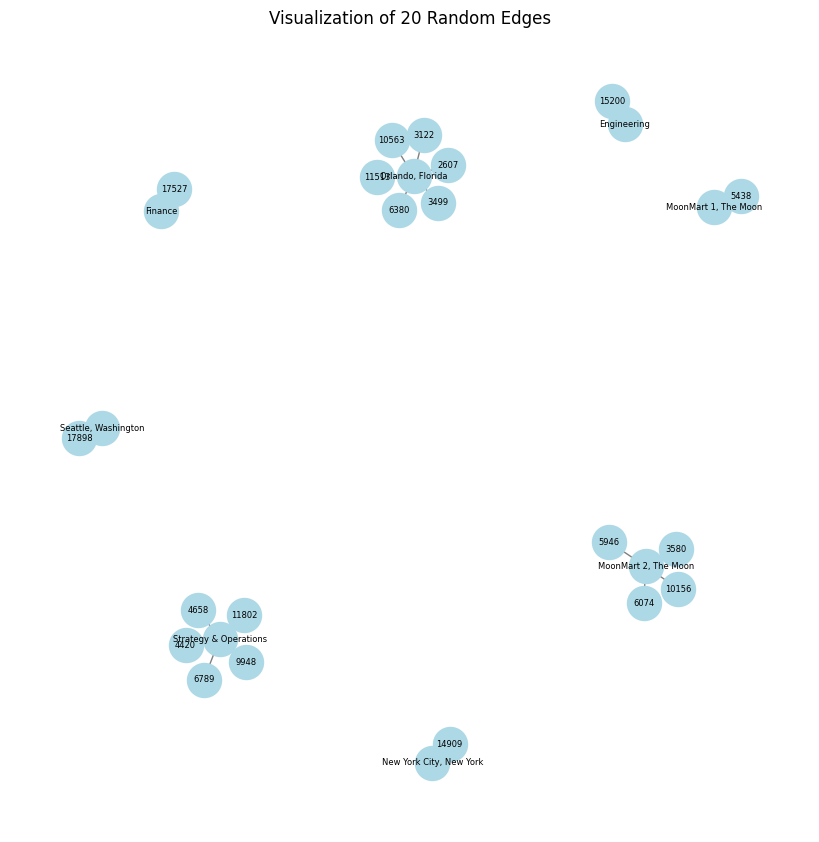

In [ ]:
if G.number_of_edges() >= 10:
    sampled_edges = random.sample(list(G.edges()), 20)  # Sample 20 edges
else:
    sampled_edges = list(G.edges())

# Create subgraph with sampled edges
H = nx.Graph()
H.add_edges_from(sampled_edges)

# Sample subgraph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(H, seed=42)
nx.draw(H, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=600, font_size=6)

plt.title("Visualization of 20 Random Edges")
plt.show()


In [ ]:
# Compute PageRank (influence measure)
pagerank_scores = nx.pagerank(G, alpha=0.85)

# Top 10 most infuential entities
top_employees = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]

print("=" * 50)
print("Top 10 Influential Entities by PageRank:")
print("=" * 50)

for x in top_employees:
  print(x)

Top 10 Influential Entities by PageRank:
('Strategy & Operations', 0.15085608377022938)
('Orlando, Florida', 0.08601973979874267)
('MoonMart 2, The Moon', 0.05573203558820394)
('MoonMart 1, The Moon', 0.055437498350329406)
('Engineering', 0.03424577334926806)
('San Francisco, California', 0.02050226235248323)
('New York City, New York', 0.016955659617185006)
('Seattle, Washington', 0.016161902131313313)
('Sales', 0.011034998792871535)
('Finance', 0.006536794072907176)


## Pagerank Insights

### Pagerank is a common graph algorithm that measures the importance of nodes by analyzing how many nodes are pointing towards it.



*   Strategy & Operations is a highly connected hub in the network potentially acting as a central node influencing many other entities. This could make sense as strategy and operations probably works with many cross-functional teams.

* MoonMart 1, The Moon (0.0554) and MoonMart 2, The Moon (0.0557) have relatively high influence showing they are well-connected and serve as important entities.

*   Orlando, San Francisco, and New York all have higher pagerank / influence scores meaning that they serve as a major hub or central office.


In [ ]:
# Compute turnover risks per departments and locations
turnover = {}

for node in G.nodes:
    if isinstance(node, str):
        # Count terminated employees in per location and department by checking employee status.
        turnover_count = sum(1 for neighbor in G.neighbors(node) if G.nodes[neighbor]["turnover"] == "Terminated")

        # Total count of nodes
        total_count = len(list(G.neighbors(node)))

        # Getting overall turnover risks
        turnover[node] = turnover_count / total_count if total_count > 0 else 0

# Display highest turnover rates
risky_departments = sorted(turnover.items(), key=lambda x: x[1], reverse=True)
risky_departments = risky_departments[:10]


print("=" * 50)
print("Departments with Highest Turnover Risk:")
print("=" * 50)
for x in risky_departments:
  print(x)



Departments with Highest Turnover Risk:
('MoonMart 1, The Moon', 0.8703164787195343)
('MoonMart 2, The Moon', 0.8633731451321028)
('Orlando, Florida', 0.829401953776507)
('Sales', 0.8080697928026173)
('Strategy & Operations', 0.7998895942589015)
('Tempe, Arizona', 0.7601156069364162)
('HR', 0.6814516129032258)
('San Francisco, California', 0.5384164222873901)
('Seattle, Washington', 0.5282738095238095)
('New York City, New York', 0.5127659574468085)


## Turnover Graph Analysis Insights


*   MoonMart 1, The Moon (87.0%) and MoonMart 2, The Moon (86.3%) have the highest turnover risk. This could make sense as not too many people would want to live on the moon and work.
*    Orlando, Florida also has a high turnover (82.9%)

*   Sales (80.8%) and Strategy & Operations (79.9%) are struggling with retention as well.
*   San Francisco (53.8%), Seattle (52.8%), and New York City (51.3%) all have relatively high turnover.

* HR Department Has a High Turnover Rate (68.1%)







